In [214]:
import pandas as pd
import re
from string import digits
import nltk
from fuzzywuzzy import fuzz
#nltk.download()



import time
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)

--- 0.00016117095947265625 seconds ---


In [215]:
#Read in Processed file
#df = pd.read_csv('ALL1718_PXD.csv')
print("--- %s seconds ---" % (time.time() - start_time))

--- 13.127509117126465 seconds ---


In [216]:
len(df)

2152695

In [217]:
#df = pd.read_csv('user_document_df.csv')
#df.shape

In [218]:
#Get rid of null value
df = df.drop(df[df['text'].isnull()].index)
print("--- %s seconds ---" % (time.time() - start_time))

--- 14.271937131881714 seconds ---


In [219]:
#CV
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction import text

even_more_stop_words = ['just', 'll']
additional_stop_words = ['bitcoin', 'blockchain', 'btc','cryptocurrency', 'crypto', 'rt', 'bitcoins', 'usd']
additional_stop_words.extend(even_more_stop_words)



stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)
vectorizer = CountVectorizer(min_df = 1, stop_words = stop_words)
dtm = vectorizer.fit_transform(df['text']) 
print("--- %s seconds ---" % (time.time() - start_time))

--- 64.19578289985657 seconds ---


In [220]:
#NMF
from sklearn.decomposition import NMF

num_topics = 8
top_words = 8

nmf = NMF(num_topics)

doc_topics_nmf = nmf.fit_transform(dtm)
#dtm_nmf = Normalizer(copy=False).fit_transform(dtm_nmf)
topic_words = nmf.components_

vocabulary = vectorizer.get_feature_names()
print("--- %s seconds ---" % (time.time() - start_time))

--- 286.1796438694 seconds ---


In [221]:
#Find argmax topic for each document(tweet) and add column onto orig df
import numpy as np

doc_topics = nmf.fit_transform(dtm)
topics_words = nmf.components_
max_topic_per_doc = np.argmax(doc_topics,axis=1)
topic_dist = []
for j in range(topics_words.shape[0]):
    topic_dist.append(sorted(topics_words[j], reverse=True)[:top_words])
    np.array(topic_dist)
df['Topic'] = max_topic_per_doc
print("--- %s seconds ---" % (time.time() - start_time))

--- 515.9814159870148 seconds ---


In [222]:
topic_dist

[[21.30730085883732,
  9.607122201110414,
  8.170544096233982,
  8.09743713968085,
  6.605302395075656,
  5.421742263448369,
  5.048700222599181,
  3.323713605472282],
 [17.301719597005235,
  6.025805940030879,
  4.396054915151591,
  2.5773009162226663,
  2.3497767159486895,
  2.0332494364965856,
  2.0161319953232693,
  1.8441531947947065],
 [18.874985558193135,
  1.8819522714378463,
  1.301089503219881,
  1.1975836172905725,
  1.081530249959184,
  0.9660280633495277,
  0.921910730214073,
  0.8049829133829389],
 [18.202113849116937,
  2.9010574464103285,
  2.2618979024894665,
  1.8800771021451992,
  1.871170124785595,
  1.803019957371503,
  1.4750174684714075,
  1.3331504323024068],
 [17.373878799964746,
  1.6338919351660615,
  1.5033793102091437,
  1.427452335028666,
  1.151241576765232,
  1.0027364989191518,
  1.0007044586295621,
  0.9165240710581035],
 [17.939778612323863,
  3.478946427853496,
  2.1599992598651196,
  1.149710228001727,
  1.0991026737005376,
  1.065219131282488,
  0.

In [223]:
words_list = []
for r in topics_words:
    a = sorted([(v,i) for i,v in enumerate(r)],reverse=True)[:top_words]
    words_list.append([vocabulary[e[1]] for e in a])
    np.array(words_list)
#trial_dict[2] = np.array(words_list)
#Topics_legend = np.array(words_list).tolist()
print("--- %s seconds ---" % (time.time() - start_time))

--- 522.130124092102 seconds ---


In [224]:
#df = df.drop(columns = 'Unnamed: 0')

In [225]:
df.sample(100)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,date,username,retweets,favorites,text,month,Topic
2087575,2087575,7736015,692497,2018-02-03 19:53:19,Coinboard,0.0,0.0,from messengers to food reviews companies incorporate blockchain into apps,2.0,1
338571,338571,2083749,606612,2017-08-14 12:16:13,daprinceofGod,0.0,0.0,in all the times i lecture newbies about bitcoin i always make them have the understanding that bitcoin is,8.0,6
379260,379260,2257004,779867,2017-08-05 04:40:28,iPayYouWallet,3.0,6.0,people used to bury bitcoin now they are burying bitcoincash btc blocks are full and we are busy building bcc infrastructure stay tuned,8.0,1
1072625,1072625,4992743,903817,2017-11-25 02:34:34,jorr814,1.0,19.0,at the cavs game — guy just made the jumbotron with a homemade sign that buy bitcoin tothemoon,11.0,5
485870,485870,2713338,513613,2017-09-17 15:22:26,siutigertech,0.0,0.0,'crazy' icos are driven by bitcoin millionaires who need to diversify but don't want to pay…,9.0,1
1889779,1889779,7195993,148272,2018-02-23 17:06:41,CryptoDemetrius,0.0,0.0,cointext is in private beta aka it isn't live yet and there is no real plan for how to get this technology in people's hands even once it is bitcoin has been around yrs banking a few unbanked mi...,2.0,1
519903,519903,2846962,702346,2017-09-13 11:54:41,10WallStreet,0.0,1.0,bitcoin fad could crash globaleconomy despite fed toxic money printing,9.0,6
750537,750537,3820917,648223,2017-10-12 12:13:51,EXCELLENTBREEZE,0.0,0.0,tech surprising places where you can pay with bitcoin in nigeria and other…,10.0,6
257794,257794,1728460,57855,2017-08-29 17:15:02,PennystockEmpor,0.0,0.0,sing first bitcoin capital launched weedcoin earlier this year to provide a new cryptocurrency for the cannabis industry,8.0,4
524559,524559,2864103,719487,2017-09-12 23:51:28,CSigmaShow,1.0,1.0,if would have invested of the billion in fines they have occurred in bitcoin,9.0,1


In [226]:
words_list

[['ethereum',
  'eth',
  'litecoin',
  'ripple',
  'xrp',
  'ltc',
  'ico',
  'cryptocurrencies'],
 ['like', 'people', 'don', 'know', 'think', 'currency', 'value', 'market'],
 ['price',
  'market',
  'analysis',
  'high',
  'average',
  'time',
  'current',
  'value'],
 ['free', 'earn', 'sign', 'join', 'mining', 'coins', 'link', 'airdrop'],
 ['new', 'high', 'post', 'currency', 'trading', 'year', 'exchange', 'market'],
 ['buy', 'sell', 'time', 'exchange', 'don', 'worth', 'people', 'want'],
 ['money', 'make', 'mining', 'want', 'currency', 'people', 'trading', 'world'],
 ['cash', 'bch', 'fork', 'litecoin', 'bcash', 'core', 'analysis', 'support']]

In [227]:
#Pull out all tweets belonging to topic 3

topic_3_df = df[df['Topic'] == 5]
#topic_3_df = topic_3_df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'])
#topic_3_df.set_index()

In [228]:
topic_3_df.sample(10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,date,username,retweets,favorites,text,month,Topic
2010788,2010788,7530541,487023,2018-02-15 15:59:07,TedKnutsonDC,1.0,0.0,cftc chair giancarlo won't commit to calling for a selfregulatory organization for cryptocurrency exchanges as commissioner quintenz did yesterday maybe in time bitcoin,2.0,5
1570683,1570683,6357040,463806,2018-01-20 17:13:12,orocrypt,2.0,3.0,bitcoin weekly trend bullish above daily bullish above buy signal is a close above for then add if close above sell signal is a close below,1.0,5
2066649,2066649,7679458,635940,2018-02-05 19:39:23,julianswift,0.0,2.0,bitcoin is at a very low point that is music to my ears the next bull run will be awesome buy the dips people,2.0,5
1949156,1949156,7359015,315497,2018-02-20 06:48:18,whiteboy1234,0.0,3.0,wow thank you i’ve never even opened a bitcoin account but how nice of you mr account pictwittercomewyhbgfwg,2.0,5
282047,282047,1836222,182624,2017-08-24 13:43:33,ByteFederal,0.0,0.0,if you’ve used bitcoin to buy anonymously the transaction may not have been private at all via,8.0,5
592742,592742,3172562,1027946,2017-09-01 00:06:16,fawaz_badranii,0.0,2.0,fun fact if u purchased worth of bitcoin years ago they would be sort million today god damit i wanted to buy years ago,9.0,5
1350507,1350507,5777526,426686,2017-12-23 04:36:42,ibnassabeel,0.0,2.0,if you missed the last right moment to buy bitcoin the new right moment is now crypto dip tothemoon,12.0,5
1476347,1476347,6111058,217824,2018-01-26 19:34:48,Matt2Harrington,0.0,2.0,buy all bitcoin in existence which literally makes it useless apple goes bankrupt i buy it and become steve jobs,1.0,5
299664,299664,1913719,260121,2017-08-21 11:40:14,adam3us,3.0,12.0,markets need both access to information and an ability to comprehend it over time you get an influencer pyramid bitcoin 's is immature yet,8.0,5
1291609,1291609,5614332,254060,2017-12-27 02:45:29,CoinMiningPool,0.0,0.0,capp volume is rising exchange hitbtc buy vol incr by btc price btc signals last days,12.0,5


In [229]:
#Viz
import matplotlib.pyplot as plt 
#plot_df = df[['Topic', 'month','date']].groupby(['month', 'Topic']).count().reset_index()

In [230]:
plot_df.head()

,month,Topic,date
0,1.0,0,16813
1,1.0,1,20657
2,1.0,2,34521
3,1.0,3,28919
4,1.0,4,19636


     date  Topic
16   4169      0
17   6004      1
18   8951      2
19   9580      3
20   4586      4
21   5957      5
22   2942      6
23  77783      7
     date  Topic
24   3700      0
25   4856      1
26   8971      2
27   7635      3
28   4679      4
29   5954      5
30   6260      6
31  79050      7
     date  Topic
32   4984      0
33   7611      1
34   8600      2
35  13027      3
36   6025      4
37   7955      5
38  14993      6
39  96806      7
      date  Topic
40    6957      0
41    8615      1
42   11244      2
43   11296      3
44    7357      4
45    8344      5
46    6015      6
47  125247      7
      date  Topic
48    8528      0
49   10444      1
50   14277      2
51   16979      3
52    8701      4
53   11306      5
54    8011      6
55  138234      7
      date  Topic
56   15182      0
57   19201      1
58   20857      2
59   30561      3
60   16845      4
61   21041      5
62   20973      6
63  237983      7
      date  Topic
64    8743      0
65   10863      1
6

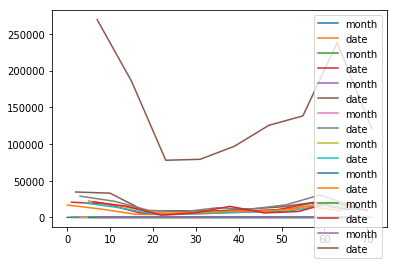

In [352]:
for month in range(6,13):
    print(plot_df[['date', 'Topic']][plot_df['month'] == month])
    #print(topic)
fig , ax = plt.subplots()

for i in plot_df.groupby('Topic'):
    print(i[1])
    a = pd.DataFrame(i[1])[['month','date']]
    a.plot(ax = ax)

In [231]:
Topic0 = plot_df[plot_df['Topic'] == 0].reset_index()
Topic1 = plot_df[plot_df['Topic'] == 1].reset_index()
Topic2 = plot_df[plot_df['Topic'] == 2].reset_index()
Topic3 = plot_df[plot_df['Topic'] == 3].reset_index()
Topic4 = plot_df[plot_df['Topic'] == 4].reset_index()
Topic5 = plot_df[plot_df['Topic'] == 5].reset_index()
Topic6 = plot_df[plot_df['Topic'] == 6].reset_index()
Topic7 = plot_df[plot_df['Topic'] == 7].reset_index()

In [232]:
Topic0

,index,month,Topic,date
0,0,1.0,0,16813
1,8,2.0,0,11224
2,16,6.0,0,4169
3,24,7.0,0,3700
4,32,8.0,0,4984
5,40,9.0,0,6957
6,48,10.0,0,8528
7,56,11.0,0,15182
8,64,12.0,0,8743


In [349]:
topic_df = pd.DataFrame()
total_count = 0

i = 0
total_count = Topic0['date'].loc[i] + Topic1['date'].loc[i] + Topic2['date'].loc[i] + Topic3['date'].loc[i] + Topic4['date'].loc[i] + Topic5['date'].loc[i] + Topic6['date'].loc[i] + Topic7['date'].loc[i]
topic_df['Topic0'] = (Topic0['date'] / total_count)
i = 1
total_count = Topic0['date'].loc[i] + Topic1['date'].loc[i] + Topic2['date'].loc[i] + Topic3['date'].loc[i] + Topic4['date'].loc[i] + Topic5['date'].loc[i] + Topic6['date'].loc[i] + Topic7['date'].loc[i]
topic_df['Topic1'] = (Topic1['date'] / total_count)
i = 2
total_count = Topic0['date'].loc[i] + Topic1['date'].loc[i] + Topic2['date'].loc[i] + Topic3['date'].loc[i] + Topic4['date'].loc[i] + Topic5['date'].loc[i] + Topic6['date'].loc[i] + Topic7['date'].loc[i]
topic_df['Topic2'] = (Topic2['date'] / total_count)
i = 3
total_count = Topic0['date'].loc[i] + Topic1['date'].loc[i] + Topic2['date'].loc[i] + Topic3['date'].loc[i] + Topic4['date'].loc[i] + Topic5['date'].loc[i] + Topic6['date'].loc[i] + Topic7['date'].loc[i]
topic_df['Topic3'] = (Topic3['date'] / total_count)
i = 4
total_count = Topic0['date'].loc[i] + Topic1['date'].loc[i] + Topic2['date'].loc[i] + Topic3['date'].loc[i] + Topic4['date'].loc[i] + Topic5['date'].loc[i] + Topic6['date'].loc[i] + Topic7['date'].loc[i]
topic_df['Topic4'] = (Topic4['date'] / total_count)
i = 5
total_count = Topic0['date'].loc[i] + Topic1['date'].loc[i] + Topic2['date'].loc[i] + Topic3['date'].loc[i] + Topic4['date'].loc[i] + Topic5['date'].loc[i] + Topic6['date'].loc[i] + Topic7['date'].loc[i]
topic_df['Topic5'] = (Topic5['date'] / total_count)
i = 6
total_count = Topic0['date'].loc[i] + Topic1['date'].loc[i] + Topic2['date'].loc[i] + Topic3['date'].loc[i] + Topic4['date'].loc[i] + Topic5['date'].loc[i] + Topic6['date'].loc[i] + Topic7['date'].loc[i]
topic_df['Topic6'] = (Topic6['date'] / total_count)
i = 7
total_count = Topic0['date'].loc[i] + Topic1['date'].loc[i] + Topic2['date'].loc[i] + Topic3['date'].loc[i] + Topic4['date'].loc[i] + Topic5['date'].loc[i] + Topic6['date'].loc[i] + Topic7['date'].loc[i]
topic_df['Topic7'] = (Topic7['date'] / total_count)

In [345]:
#topic_df['Topic0'] = (Topic0['date'] / total_count)
#topic_df['Topic1'] = Topic1['date']
#topic_df['Topic2'] = Topic2['date']
#topic_df['Topic3'] = Topic3['date']
#topic_df['Topic4'] = Topic4['date']
#topic_df['Topic5'] = Topic5['date']
#topic_df['Topic6'] = Topic6['date']
#topic_df['Topic7'] = Topic7['date']

In [346]:
topic_df.head(20)

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7
0,0.038803,0.066019,0.287742,0.238793,0.122724,0.120475,0.097967,0.703638
1,0.025904,0.058147,0.274839,0.180818,0.083031,0.079870,0.069309,0.484875
2,0.009622,0.019189,0.074609,0.079105,0.028662,0.032187,0.013590,0.203278
3,0.008539,0.015520,0.074776,0.063044,0.029244,0.032171,0.028917,0.206589
4,0.011503,0.024325,0.071683,0.107568,0.037656,0.042983,0.069258,0.252993
5,0.016056,0.027533,0.093722,0.093274,0.045981,0.045084,0.027785,0.327321
6,0.019682,0.033379,0.119003,0.140201,0.054381,0.061089,0.037006,0.361261
7,0.035039,0.061366,0.173849,0.252351,0.105281,0.113689,0.096882,0.621945
8,0.020178,0.034718,0.087337,0.118616,0.062968,0.055983,0.041958,0.317050


In [347]:
#Remove first two rows and 
first_row = topic_df.loc[0]
topic_df = topic_df.append(first_row)
sec_row = topic_df.loc[1]
topic_df = topic_df.append(sec_row)
#topic_df.drop(0)

In [350]:
#append to end
topic_df

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7
0,0.038803,0.066019,0.287742,0.238793,0.122724,0.120475,0.097967,0.703638
1,0.025904,0.058147,0.274839,0.180818,0.083031,0.079870,0.069309,0.484875
2,0.009622,0.019189,0.074609,0.079105,0.028662,0.032187,0.013590,0.203278
3,0.008539,0.015520,0.074776,0.063044,0.029244,0.032171,0.028917,0.206589
4,0.011503,0.024325,0.071683,0.107568,0.037656,0.042983,0.069258,0.252993
5,0.016056,0.027533,0.093722,0.093274,0.045981,0.045084,0.027785,0.327321
6,0.019682,0.033379,0.119003,0.140201,0.054381,0.061089,0.037006,0.361261
7,0.035039,0.061366,0.173849,0.252351,0.105281,0.113689,0.096882,0.621945
8,0.020178,0.034718,0.087337,0.118616,0.062968,0.055983,0.041958,0.317050


In [ ]:
topic_df['month'] = 

In [351]:
topic_df.to_csv('topic_df.csv')

In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [270]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,date,username,retweets,favorites,text,month,Topic
0,0,6,6,2017-06-29 23:59:17,LasVegasPaco,0.0,2.0,how bitcoin does versus gold fiat and all world's money ag au btc,6.0,6
1,1,16,16,2017-06-29 23:58:03,AltcoinsBank,1.0,0.0,re mycelium's crowdsale basically a donation not an investment by any…,6.0,6
2,2,19,19,2017-06-29 23:57:26,philipmak,0.0,0.0,bitcoin users will no longer be forced to pay the goods and services tax gst twice when transacting from the middle of this year ato,6.0,4
3,3,24,24,2017-06-29 23:56:59,Harmony_Engr,3.0,5.0,invest in a secured digital asset with latest technology on blockchain bitotal tttcoin altcoinsindex ttt cryptotrading bitcoin,6.0,1
5,5,33,33,2017-06-29 23:56:14,BitcoinPRBuzz,0.0,1.0,trading platform announces increased bitcoin leverage at x >,6.0,4


In [300]:
adam = df[df['username'] == 'adam3us']
buttcoin = df[df['username'] == 'buttcoin']
bollinger = df[df['username'] == 'bbands']
JorgeStolfi = df[df['username'] == 'JorgeStolfi']
rogerver = df[df['username'] == 'rogerver']
Bitfinexed = df[df['username'] == 'Bitfinexed']
starkness = df[df['username'] == 'starkness']
PeterLBrandt = df[df['username'] == 'PeterLBrandt']

len(str(rogerver['text']))

37

In [298]:
len(buttcoin)

0

In [293]:
even_more_stop_words = ['just', 'll', 'it']
additional_stop_words = ['bitcoin', 'blockchain', 'btc','cryptocurrency', 'crypto', 'rt', 'bitcoins', 'usd', 'it']
additional_stop_words.extend(even_more_stop_words)


stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)

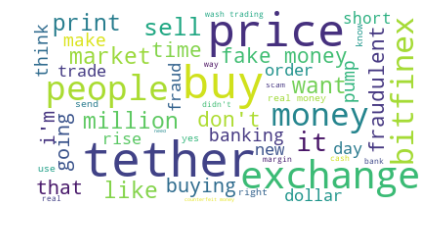

In [295]:
wordcloud = WordCloud().generate(str(bollinger['text']))
wordcloud = WordCloud(stopwords = stop_words, max_font_size=50, max_words=50, background_color="white").generate(str(Bitfinexed['text']))

# Display the generated image:
plt.figure(figsize=[7,7])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#To-do



#Visualizations, what kind to show? wordcloud